In [1]:
import pandas as pd

In [2]:
users_df = pd.read_csv('../data/entity_files/users_dataset.csv')

In [3]:
users_df.head(5)

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at,user_query_time
0,wildmary,38806620,MDQ6VXNlcjM4ODA2NjIw,https://avatars.githubusercontent.com/u/388066...,NaN,https://api.github.com/users/wildmary,https://github.com/wildmary,https://api.github.com/users/wildmary/followers,https://api.github.com/users/wildmary/followin...,https://api.github.com/users/wildmary/gists{/g...,...,NaN,NaN,NaN,18,0,1,1,2018-04-28T07:57:50Z,2022-05-25T16:06:20Z,2022-11-12
1,jhroy,1175329,MDQ6VXNlcjExNzUzMjk=,https://avatars.githubusercontent.com/u/117532...,NaN,https://api.github.com/users/jhroy,https://github.com/jhroy,https://api.github.com/users/jhroy/followers,https://api.github.com/users/jhroy/following{/...,https://api.github.com/users/jhroy/gists{/gist...,...,1.0,"Prof, journalisme, UQAM // Computational journ...",NaN,60,19,113,258,2011-11-06T03:09:52Z,2022-10-10T11:10:35Z,2022-11-12
2,Jean-Baptiste-Camps,1204247,MDQ6VXNlcjEyMDQyNDc=,https://avatars.githubusercontent.com/u/120424...,NaN,https://api.github.com/users/Jean-Baptiste-Camps,https://github.com/Jean-Baptiste-Camps,https://api.github.com/users/Jean-Baptiste-Cam...,https://api.github.com/users/Jean-Baptiste-Cam...,https://api.github.com/users/Jean-Baptiste-Cam...,...,NaN,Assoc. Prof. in Computational Philology @chart...,jbcamps,35,1,65,58,2011-11-18T11:59:27Z,2022-10-28T11:13:28Z,2022-11-12
3,cabesse,44814764,MDQ6VXNlcjQ0ODE0NzY0,https://avatars.githubusercontent.com/u/448147...,NaN,https://api.github.com/users/cabesse,https://github.com/cabesse,https://api.github.com/users/cabesse/followers,https://api.github.com/users/cabesse/following...,https://api.github.com/users/cabesse/gists{/gi...,...,NaN,NaN,NaN,12,0,6,4,2018-11-06T17:34:11Z,2022-07-12T18:51:19Z,2022-11-12
4,Lwizzzzzz,45824260,MDQ6VXNlcjQ1ODI0MjYw,https://avatars.githubusercontent.com/u/458242...,NaN,https://api.github.com/users/Lwizzzzzz,https://github.com/Lwizzzzzz,https://api.github.com/users/Lwizzzzzz/followers,https://api.github.com/users/Lwizzzzzz/followi...,https://api.github.com/users/Lwizzzzzz/gists{/...,...,NaN,NaN,NaN,11,0,7,19,2018-12-12T14:42:32Z,2022-08-05T07:18:00Z,2022-11-12


In [4]:
text_df = users_df[['login', 'bio']]

In [5]:
text_df = text_df.dropna()

In [6]:
bios = text_df['bio'].tolist()

text_blob = '. '.join(bios)


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [8]:
doc = nlp(text_blob)
counts_dict = doc.count_by(spacy.attrs.IDS['POS'])

In [9]:
for pos, count in counts_dict.items():
    human_readable_tag = doc.vocab[pos].text
    print(human_readable_tag, count)

PROPN 13128
PUNCT 8440
NOUN 7457
CCONJ 1604
ADJ 2072
INTJ 52
ADP 3699
SPACE 879
ADV 542
SYM 517
NUM 236
PART 289
PRON 941
VERB 1851
AUX 465
DET 1206
SCONJ 99
X 212


In [10]:
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Import package
import matplotlib.pyplot as plt# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [11]:
%matplotlib inline

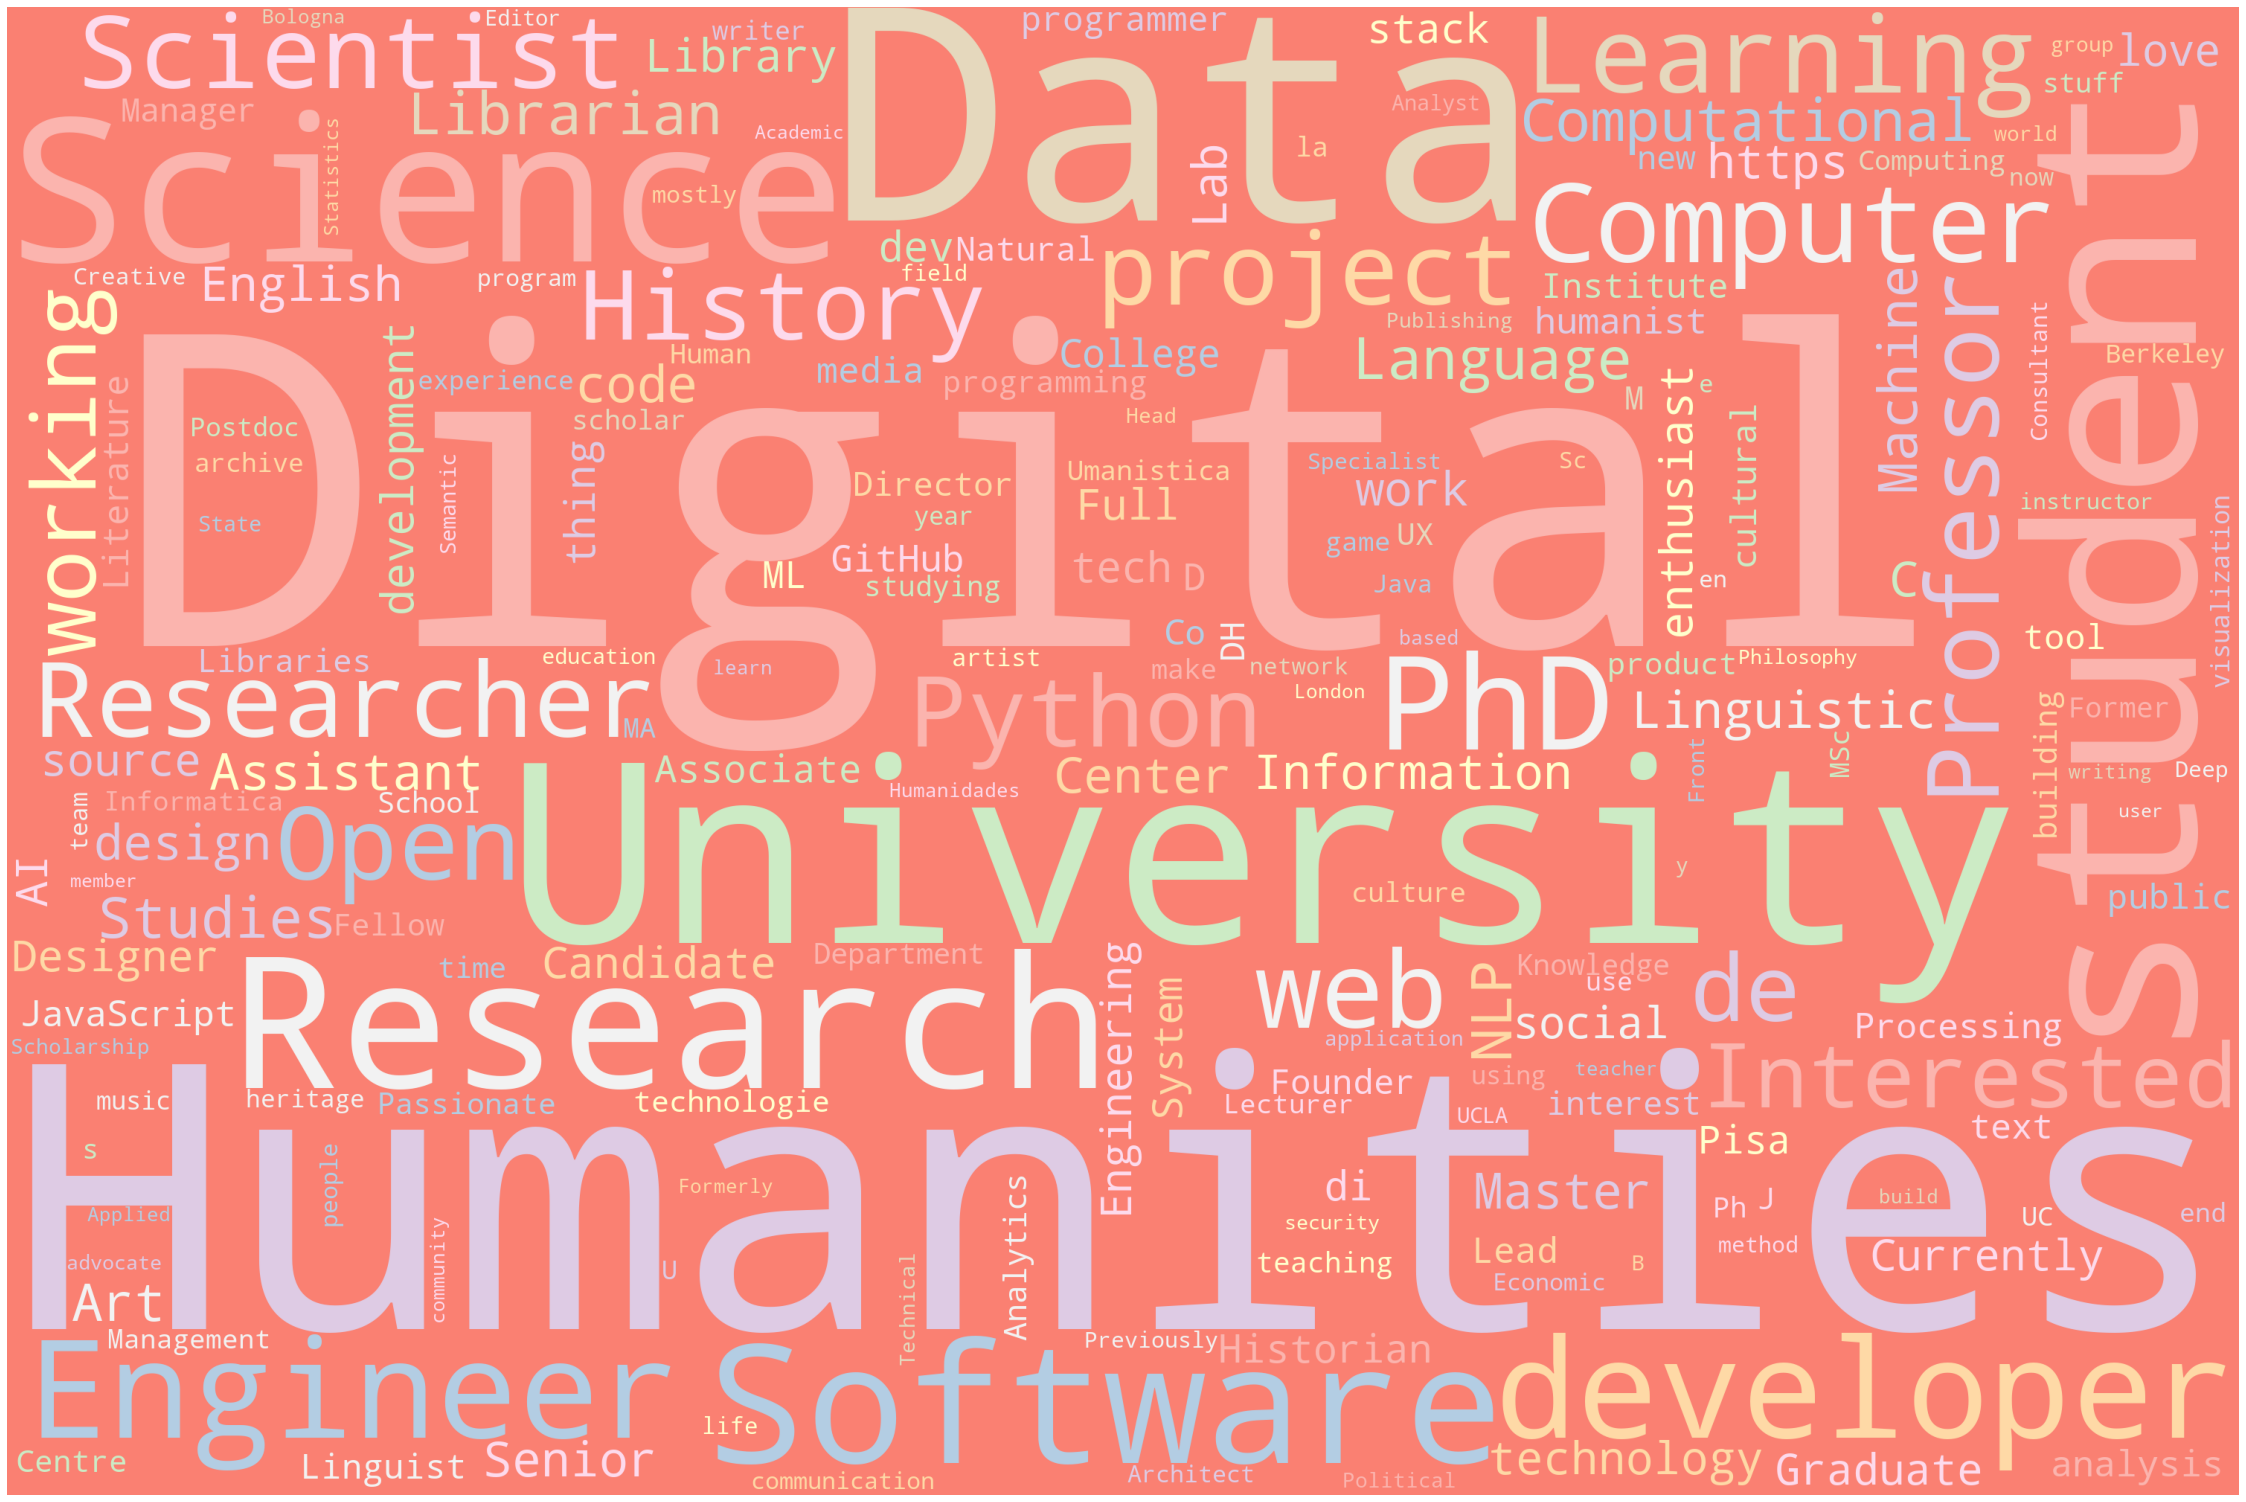

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_blob)

# Plot
plot_cloud(wordcloud)